# **Q1 Perform the regression analysis using the Boston Housing dataset**

# Task 1: Data Exploration and Preprocessing

• Exploratory Data Analysis (EDA): Perform a comprehensive EDA on the Boston Housing
dataset. Visualize the distribution of the target variable and important features using histograms,
box plots, and scatter plots.

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, RobustScaler
import statsmodels.api as sm
import seaborn as sns

In [4]:
# Load the HousingData.csv dataset
df_housing = pd.read_csv('HousingData.csv')
df_housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [5]:
#Providing information of our dataset
print("Shape:",df_housing.shape)
print("\nInfo:")
df_housing.info()

Shape: (506, 14)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
#Check for null values
for i in df_housing.columns:
    print(f"{i}: {df_housing[i].isnull().any()}")

CRIM: True
ZN: True
INDUS: True
CHAS: True
NOX: False
RM: False
AGE: True
DIS: False
RAD: False
TAX: False
PTRATIO: False
B: False
LSTAT: True
MEDV: False


In [11]:
#Replacing all the null values with median 
df_housing_final = df_housing.copy()
for cli in df_housing.columns:
    med = df_housing[cli].median()
    df_housing_final[cli]= df_housing[cli].fillna(med)

In [273]:
#verify if there are no missing values
for i in df_housing_final.columns:
    print(f"{i}: {df_housing_final[i].isnull().any()}")

CRIM: False
ZN: False
INDUS: False
CHAS: False
NOX: False
RM: False
AGE: False
DIS: False
RAD: False
TAX: False
PTRATIO: False
B: False
LSTAT: False
MEDV: False


In [275]:
# Describe data here.
df_housing_final.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.479140,10.768775,11.028893,0.067194,0.554695,6.284634,68.845850,3.795043,9.549407,408.237154,18.455534,356.674032,12.664625,22.532806
std,8.570832,23.025124,6.704679,0.250605,0.115878,0.702617,27.486962,2.105710,8.707259,168.537116,2.164946,91.294864,7.017219,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083235,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,7.230000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,2.808720,0.000000,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [277]:
#Build the correlation matrix
print("************CORRELATION MATRIX************\n")
df_housing_final.corr(numeric_only=True)

************CORRELATION MATRIX************



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.185359,0.392632,-0.055585,0.410971,-0.220045,0.343427,-0.366025,0.601224,0.560469,0.277964,-0.365336,0.437417,-0.383895
ZN,-0.185359,1.000000,-0.507304,-0.032992,-0.498619,0.312295,-0.535341,0.632428,-0.300061,-0.304385,-0.394622,0.170125,-0.398838,0.362292
INDUS,0.392632,-0.507304,1.000000,0.054693,0.738387,-0.377978,0.614248,-0.698621,0.592735,0.716267,0.385366,-0.354840,0.564508,-0.476394
CHAS,-0.055585,-0.032992,0.054693,1.000000,0.070867,0.106797,0.074984,-0.092318,-0.003339,-0.035822,-0.109451,0.050608,-0.047279,0.183844
NOX,0.410971,-0.498619,0.738387,0.070867,1.000000,-0.302188,0.711864,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.573040,-0.427321
RM,-0.220045,0.312295,-0.377978,0.106797,-0.302188,1.000000,-0.239518,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.604323,0.695360
AGE,0.343427,-0.535341,0.614248,0.074984,0.711864,-0.239518,1.000000,-0.724354,0.447088,0.498408,0.261826,-0.268029,0.575022,-0.377572
DIS,-0.366025,0.632428,-0.698621,-0.092318,-0.769230,0.205246,-0.724354,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.483244,0.249929
RAD,0.601224,-0.300061,0.592735,-0.003339,0.611441,-0.209847,0.447088,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.467765,-0.381626
TAX,0.560469,-0.304385,0.716267,-0.035822,0.668023,-0.292048,0.498408,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.524156,-0.468536


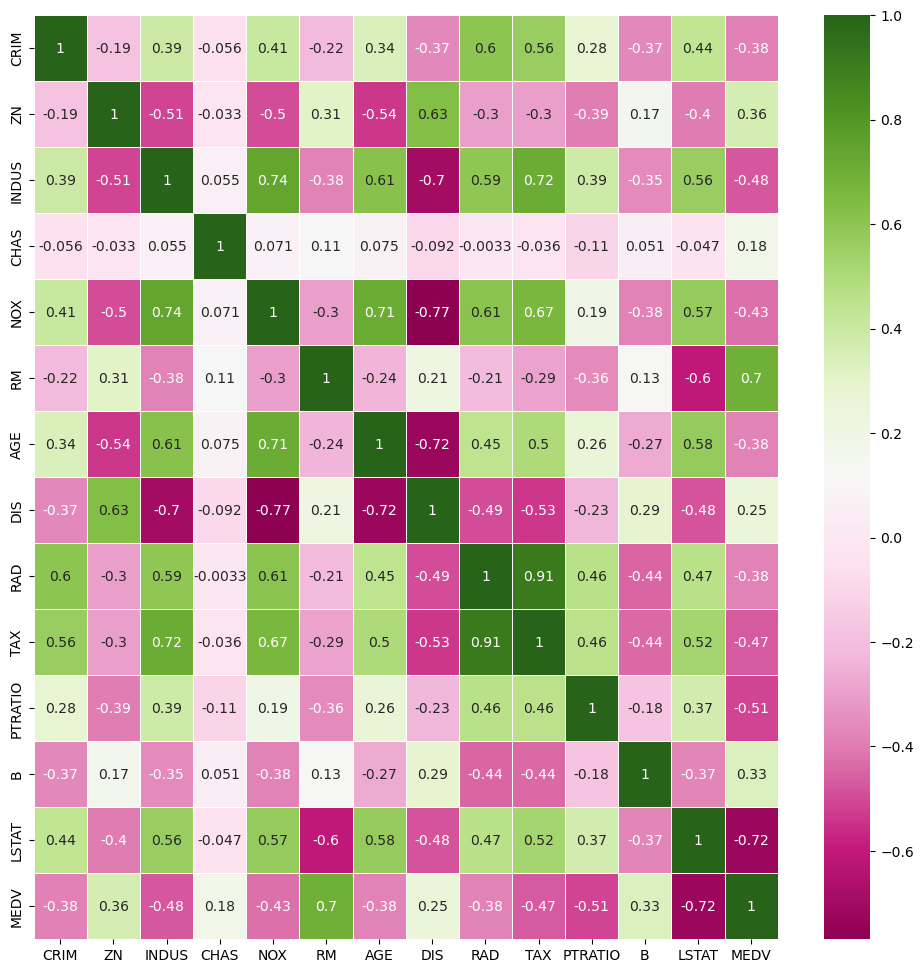

In [315]:
# Display the correlation matrix as a heatmap
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df_housing_final.corr(numeric_only=True),
            annot = True, cmap='PiYG', linewidth = 0.5);
plt.show()

In [246]:
#check the correlation of features of the dataset w.r.t. target value/y, "MEDV"
corr_mtx = df_housing_final.corr(numeric_only=True)
print(corr_mtx['MEDV'].sort_values(ascending=False))

MEDV       1.000000
RM         0.695360
ZN         0.362292
B          0.333461
DIS        0.249929
CHAS       0.183844
AGE       -0.377572
RAD       -0.381626
CRIM      -0.383895
NOX       -0.427321
TAX       -0.468536
INDUS     -0.476394
PTRATIO   -0.507787
LSTAT     -0.723093
Name: MEDV, dtype: float64


In [248]:
# Display the top 5 correlation values of independent features w.r.t. the target feature
print(df_housing_final.corr()['MEDV'].abs().sort_values(ascending=False).head(6))

MEDV       1.000000
LSTAT      0.723093
RM         0.695360
PTRATIO    0.507787
INDUS      0.476394
TAX        0.468536
Name: MEDV, dtype: float64


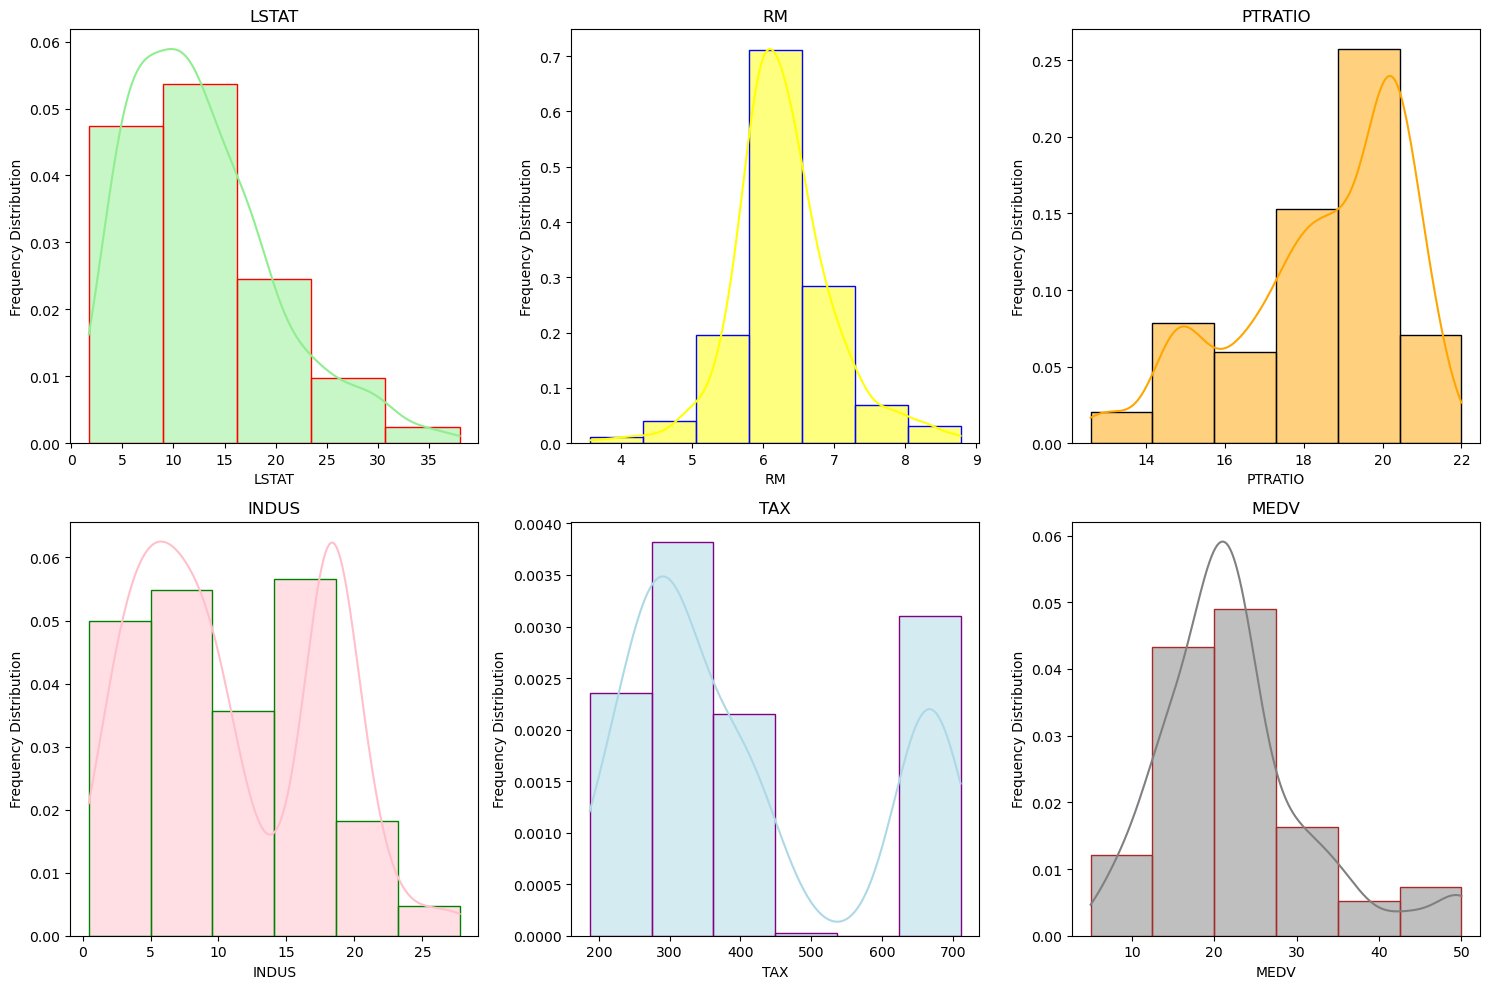

In [250]:
# histograms
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

sns.histplot(df_housing_final['RM'], ax=axes[0, 1], bins=7, color="yellow", edgecolor="blue", stat="density", kde=True)
axes[0, 1].set_title("RM")
axes[0, 1].set_ylabel('Frequency Distribution')

sns.histplot(df_housing_final['LSTAT'], ax=axes[0, 0], bins=5, color="lightgreen", edgecolor="red", stat="density", kde=True)
axes[0, 0].set_title("LSTAT")
axes[0, 0].set_ylabel('Frequency Distribution')

sns.histplot(df_housing_final['PTRATIO'], ax=axes[0, 2], bins=6, color="orange", edgecolor="black", stat="density", kde=True)
axes[0, 2].set_title("PTRATIO")
axes[0, 2].set_ylabel('Frequency Distribution')

sns.histplot(df_housing_final['INDUS'], ax=axes[1, 0], bins=6, color="pink", edgecolor="green", stat="density", kde=True)
axes[1, 0].set_title("INDUS")
axes[1, 0].set_ylabel('Frequency Distribution')

sns.histplot(df_housing_final['TAX'], ax=axes[1, 1], bins=6, color="lightblue", edgecolor="purple", stat="density", kde=True)
axes[1, 1].set_title("TAX")
axes[1, 1].set_ylabel('Frequency Distribution')

sns.histplot(df_housing_final['MEDV'], ax=axes[1, 2], bins=6, color="grey", edgecolor="brown", stat="density", kde=True)
axes[1, 2].set_title("MEDV")
axes[1, 2].set_ylabel('Frequency Distribution')

fig.tight_layout()
plt.show()

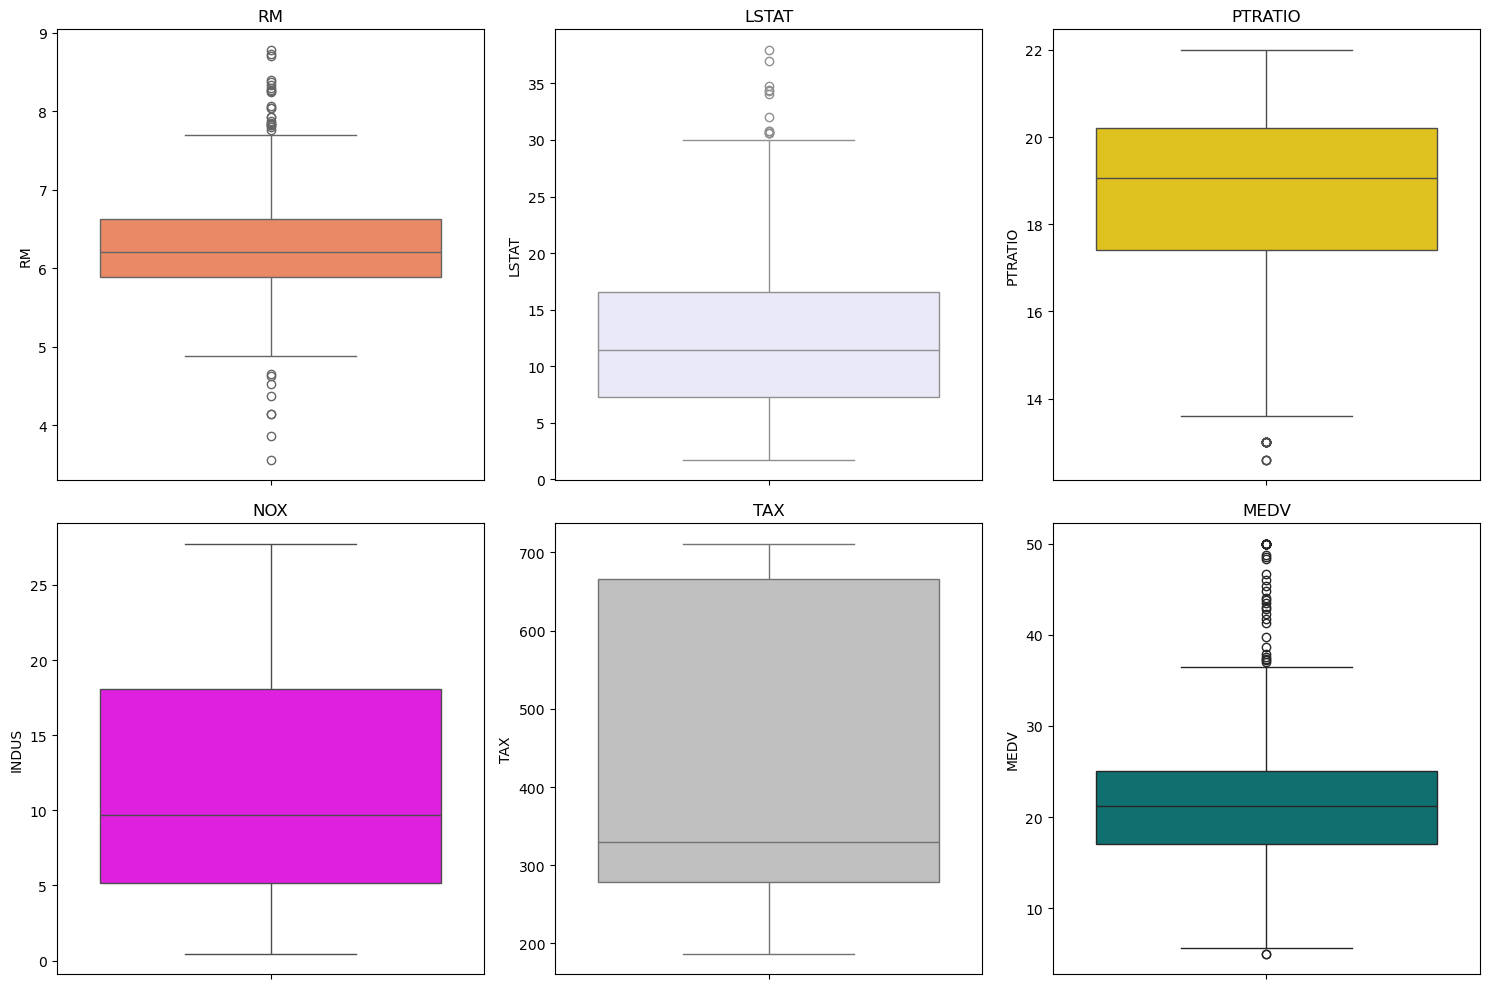

In [252]:
#boxplots
def graph_box(col, ax, title, clr):
    sns.boxplot(data=df_housing_final[col], ax=ax, color=clr)
    ax.set_title(title)
 
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
graph_box('RM', axes[0,0], 'RM', 'coral')
graph_box('LSTAT', axes[0,1], 'LSTAT', 'lavender')
graph_box('PTRATIO', axes[0,2], 'PTRATIO', 'gold')
graph_box('INDUS', axes[1,0], 'NOX', 'magenta')
graph_box('TAX', axes[1,1], 'TAX', 'silver')
graph_box('MEDV', axes[1,2], 'MEDV', 'teal')

fig.tight_layout()
plt.show()

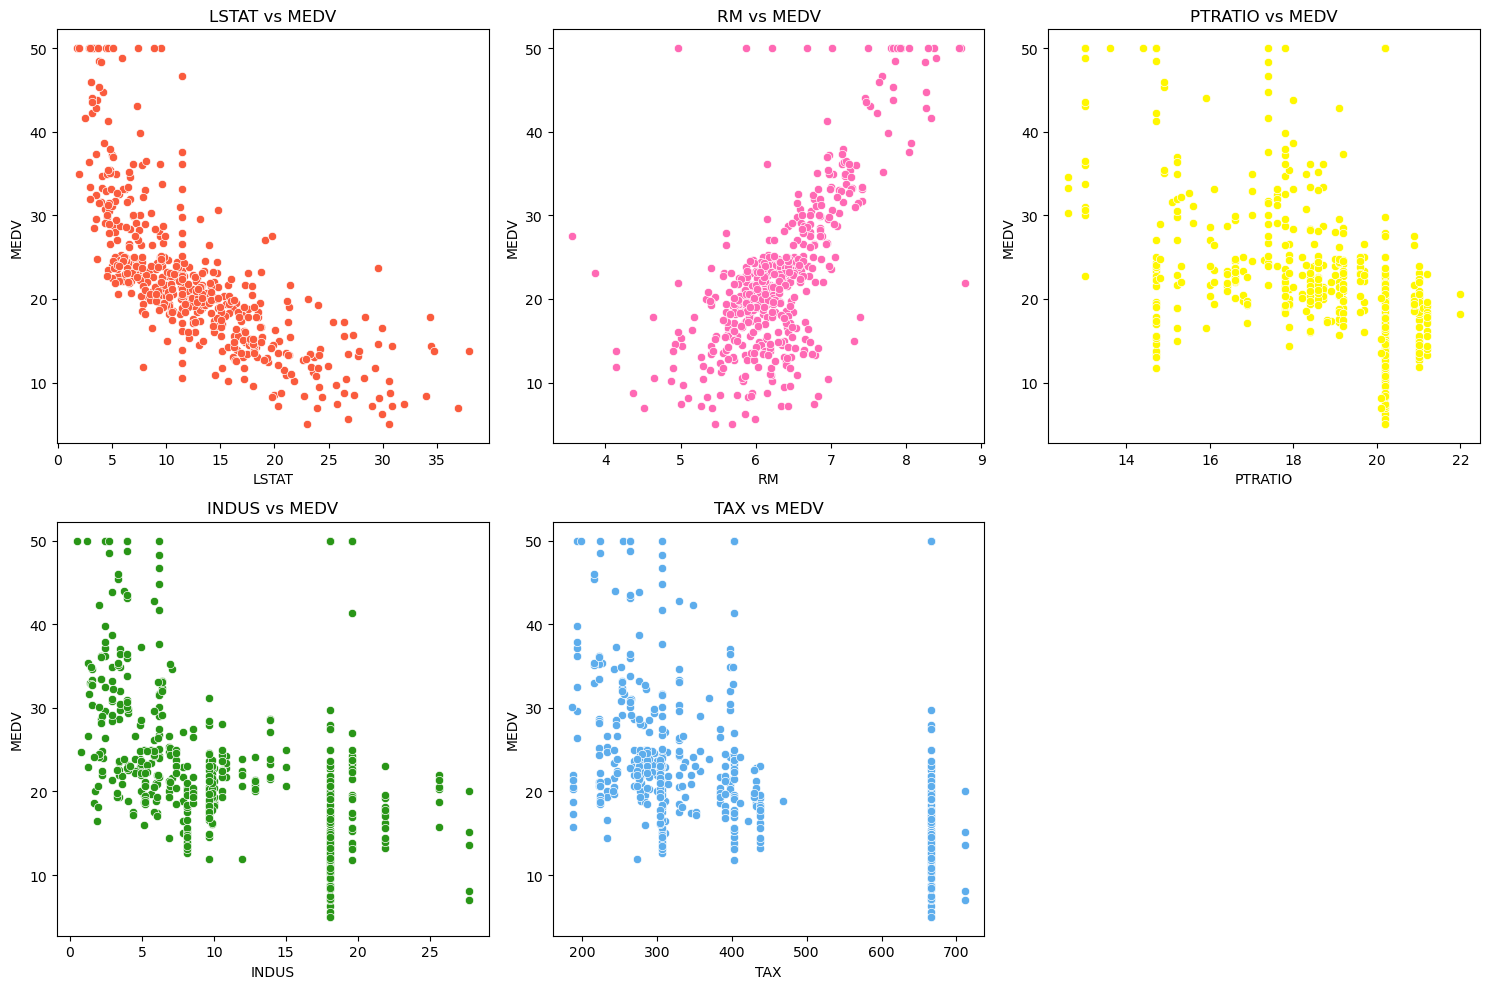

In [305]:
#scatterplots
def graph_scatter(col, ax, title, clr):
    sns.scatterplot(data=df_housing_final, x=col, y='MEDV', ax=ax, color=clr)
    ax.set_title(title)
 
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
graph_scatter('RM', axes[0,1], 'RM vs MEDV', '#FF69B4')
graph_scatter('LSTAT', axes[0,0], 'LSTAT vs MEDV', '#FA5B3D')
graph_scatter('PTRATIO', axes[0,2], 'PTRATIO vs MEDV', '#FFF700')
graph_scatter('INDUS', axes[1,0], 'INDUS vs MEDV', '#299617')
graph_scatter('TAX', axes[1,1], 'TAX vs MEDV', '#5DADEC')
fig.delaxes(axes[1,2])
fig.tight_layout()
plt.show()

# Task 2: Regression Analysis:

• Model Implementation: Using the provided code as a base, implement linear, ridge, lasso, and
OLS regression models.

• Model Evaluation: Evaluate each model's performance using the R^2 score and Mean
Squared Error (MSE)

OLS Regression R^2 score: 0.7076
OLS Regression MSE: 21.7844

Linear Regression R^2 score: 0.7076
Linear Regression MSE: 21.7844

Ridge Regression R^2 score: 0.7057
Ridge Regression MSE: 21.9301

Lasso Regression R^2 score: 0.7076
Lasso Regression MSE: 21.7861



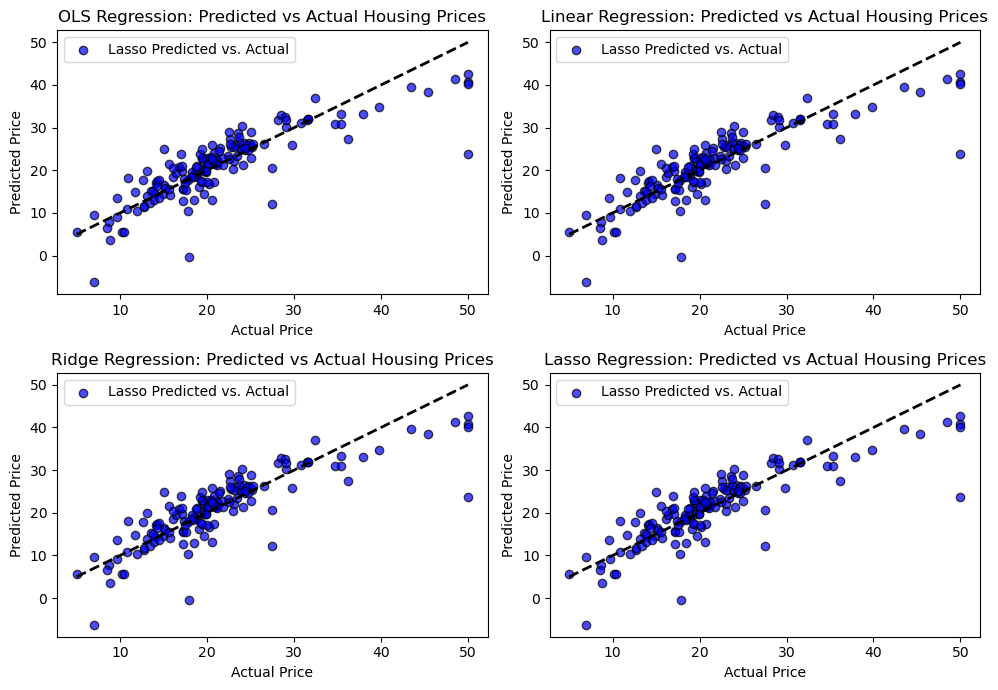

In [307]:
# **multiple linear regression**

# Define the feature matrix X and the target variable y
X_housing = df_housing_final.drop('MEDV', axis = 1)
y_housing = df_housing_final['MEDV']

# Split the dataset into training and testing sets
X_housing_train, X_housing_test, y_housing_train, y_housing_test = train_test_split(X_housing, y, test_size=0.3, random_state=42)

# Feature scaling for sklearn models
scaler = RobustScaler()
X_housing_train_scaled = scaler.fit_transform(X_housing_train)
X_housing_test_scaled = scaler.transform(X_housing_test)

# Add a constant to the feature set for OLS regression
X_housing_ols_train = sm.add_constant(X_housing_train)
X_housing_ols_test = sm.add_constant(X_housing_test)

#finding best hyperparameters for Ridge and Lasso Models
housing_alpha_list = [0.00001, 0.0001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
housing_alpha_rr = 0
housing_alpha_lr = 0
housing_ridge = RidgeCV(alphas = housing_alpha_list).fit(X_housing_train_scaled, y_housing_train)
housing_lasso = LassoCV(alphas = housing_alpha_list).fit(X_housing_train_scaled, y_housing_train)
housing_alpha_rr = ridge.alpha_
housing_alpha_lr = lasso.alpha_

# Initialize and train models
housing_ols_model = sm.OLS(y_housing_train, X_housing_ols_train).fit()
housing_linear_model = LinearRegression().fit(X_housing_train_scaled, y_housing_train)
housing_ridge_cv = RidgeCV(alphas = [alpha_rr]).fit(X_housing_train_scaled, y_housing_train)
housing_lasso_cv = LassoCV(alphas = [alpha_lr]).fit(X_housing_train_scaled, y_housing_train)


# Predict with the models
y_housing_pred_ols = housing_ols_model.predict(X_housing_ols_test)
y_housing_pred_linear = housing_linear_model.predict(X_housing_test_scaled)
y_housing_pred_ridge = housing_ridge_cv.predict(X_housing_test_scaled)
y_housing_pred_lasso = housing_lasso_cv.predict(X_housing_test_scaled)

# Calculate and print R^2 score and MSE for each model
housing_models = ['OLS', 'Linear', 'Ridge', 'Lasso']
housing_predictions = [y_housing_pred_ols, y_housing_pred_linear, y_housing_pred_ridge, y_housing_pred_lasso]
for name, y_housing_pred in zip(housing_models, housing_predictions):
    print(f"{name} Regression R^2 score: {r2_score(y_housing_test, y_housing_pred):.4f}")
    print(f"{name} Regression MSE: {mean_squared_error(y_housing_test, y_housing_pred):.4f}\n")

# Plotting Actual vs Predicted prices for all models
fig, axs = plt.subplots(2, 2, figsize=(10, 7))
axs = axs.flatten()

for i, (housing_name, housing_y_pred) in enumerate(zip(models, predictions)):
    axs[i].scatter(y_housing_test, y_housing_pred, color='blue', edgecolor='k', alpha=0.7, label=f'{name} Predicted vs. Actual')
    axs[i].plot([y_housing_test.min(), y_housing_test.max()], [y_housing_test.min(), y_housing_test.max()], 'k--', lw=2)
    axs[i].set_xlabel('Actual Price')
    axs[i].set_ylabel('Predicted Price')
    axs[i].set_title(f'{housing_name} Regression: Predicted vs Actual Housing Prices')
    axs[i].legend()

plt.tight_layout()
plt.show()

OLS Regression R^2 score: 0.5511
OLS Regression MSE: 32.9171

Linear Regression R^2 score: 0.5511
Linear Regression MSE: 32.9171

Ridge Regression R^2 score: 0.5515
Ridge Regression MSE: 32.8917

Lasso Regression R^2 score: 0.5511
Lasso Regression MSE: 32.9170



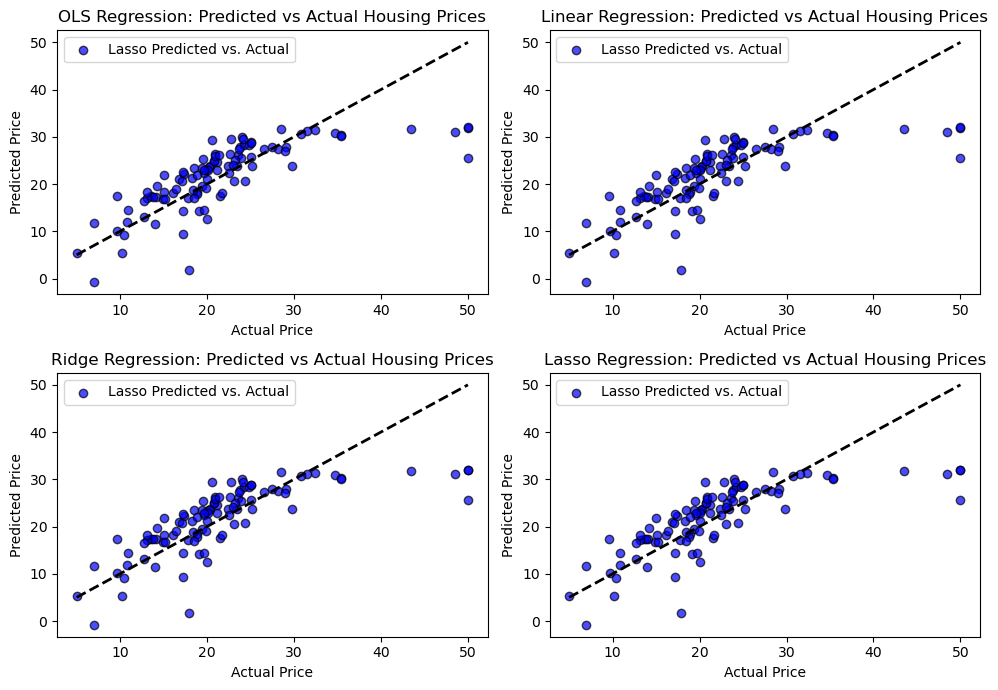

In [309]:
# simple linear regression using LSTAT

# Define the feature matrix X and the target variable y
X_housing = df_housing_final.drop('MEDV', axis = 1)
y_housing = df_housing_final['MEDV']

# Use only the LSTAT feature
X_housing_lstat = df_housing_final[['LSTAT']].values.reshape(-1,1)
y_housing = df_housing_final['MEDV']

# Split the dataset into training and testing sets
X_housing_train, X_housing_test, y_housing_train, y_housing_test = train_test_split(X_housing_lstat, y, test_size=0.2, random_state=42)

# Feature scaling for sklearn models
scaler = RobustScaler()
X_housing_train_scaled = scaler.fit_transform(X_housing_train)
X_housing_test_scaled = scaler.transform(X_housing_test)

# Add a constant to the feature set for OLS regression
X_housing_ols_train = sm.add_constant(X_housing_train)
X_housing_ols_test = sm.add_constant(X_housing_test)

#finding best hyperparameters for Ridge and Lasso Models
housing_alpha_list = [0.00001, 0.0001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
housing_alpha_rr = 0
housing_alpha_lr = 0
housing_ridge = RidgeCV(alphas = housing_alpha_list).fit(X_housing_train_scaled, y_housing_train)
housing_lasso = LassoCV(alphas = housing_alpha_list).fit(X_housing_train_scaled, y_housing_train)
housing_alpha_rr = ridge.alpha_
housing_alpha_lr = lasso.alpha_

# Initialize and train models
housing_ols_model = sm.OLS(y_housing_train, X_housing_ols_train).fit()
housing_linear_model = LinearRegression().fit(X_housing_train_scaled, y_housing_train)
housing_ridge_cv = RidgeCV(alphas = [alpha_rr]).fit(X_housing_train_scaled, y_housing_train)
housing_lasso_cv = LassoCV(alphas = [alpha_lr]).fit(X_housing_train_scaled, y_housing_train)


# Predict with the models
y_housing_pred_ols = housing_ols_model.predict(X_housing_ols_test)
y_housing_pred_linear = housing_linear_model.predict(X_housing_test_scaled)
y_housing_pred_ridge = housing_ridge_cv.predict(X_housing_test_scaled)
y_housing_pred_lasso = housing_lasso_cv.predict(X_housing_test_scaled)

# Calculate and print R^2 score and MSE for each model
housing_models = ['OLS', 'Linear', 'Ridge', 'Lasso']
housing_predictions = [y_housing_pred_ols, y_housing_pred_linear, y_housing_pred_ridge, y_housing_pred_lasso]
for name, y_housing_pred in zip(housing_models, housing_predictions):
    print(f"{name} Regression R^2 score: {r2_score(y_housing_test, y_housing_pred):.4f}")
    print(f"{name} Regression MSE: {mean_squared_error(y_housing_test, y_housing_pred):.4f}\n")

# Plotting Actual vs Predicted prices for all models
fig, axs = plt.subplots(2, 2, figsize=(10, 7))
axs = axs.flatten()

for i, (housing_name, housing_y_pred) in enumerate(zip(models, predictions)):
    axs[i].scatter(y_housing_test, y_housing_pred, color='blue', edgecolor='k', alpha=0.7, label=f'{name} Predicted vs. Actual')
    axs[i].plot([y_housing_test.min(), y_housing_test.max()], [y_housing_test.min(), y_housing_test.max()], 'k--', lw=2)
    axs[i].set_xlabel('Actual Price')
    axs[i].set_ylabel('Predicted Price')
    axs[i].set_title(f'{housing_name} Regression: Predicted vs Actual Housing Prices')
    axs[i].legend()

plt.tight_layout()
plt.show()

OLS Regression R^2 score: 0.3708
OLS Regression MSE: 46.1448

Linear Regression R^2 score: 0.3708
Linear Regression MSE: 46.1448

Ridge Regression R^2 score: 0.3712
Ridge Regression MSE: 46.1140

Lasso Regression R^2 score: 0.3708
Lasso Regression MSE: 46.1446



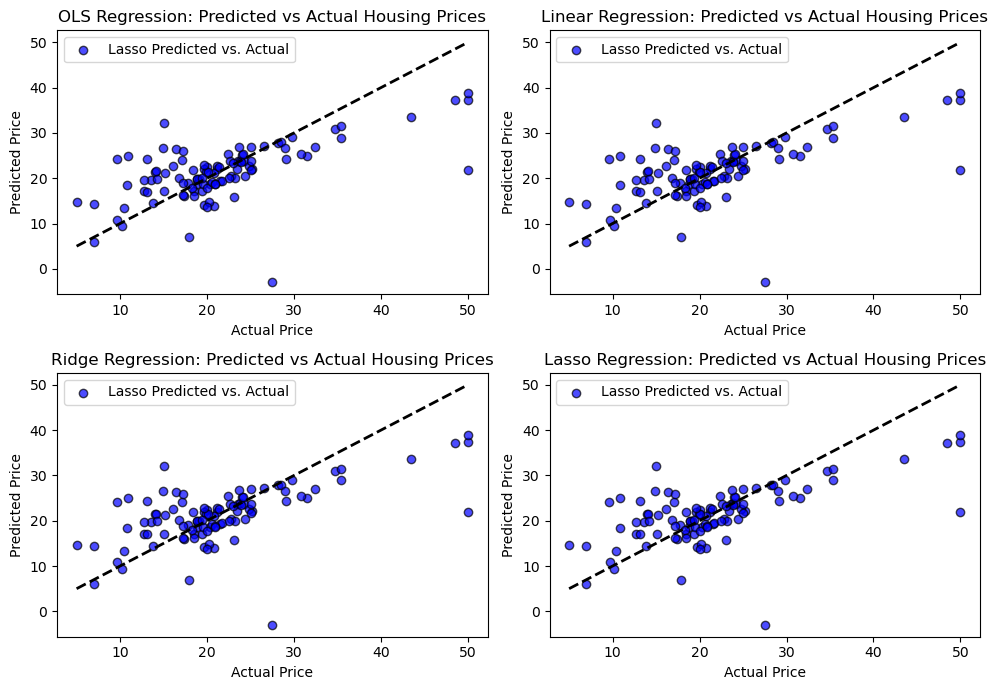

In [311]:
# simple linear regression using RM

# Define the feature matrix X and the target variable y
X_housing = df_housing_final.drop('MEDV', axis = 1)
y_housing = df_housing_final['MEDV']

# Use only the RM feature
X_housing_rm = df_housing_final[['RM']].values.reshape(-1,1)
y_housing = df_housing_final['MEDV']

# Split the dataset into training and testing sets
X_housing_train, X_housing_test, y_housing_train, y_housing_test = train_test_split(X_housing_rm, y, test_size=0.2, random_state=42)

# Feature scaling for sklearn models
scaler = RobustScaler()
X_housing_train_scaled = scaler.fit_transform(X_housing_train)
X_housing_test_scaled = scaler.transform(X_housing_test)

# Add a constant to the feature set for OLS regression
X_housing_ols_train = sm.add_constant(X_housing_train)
X_housing_ols_test = sm.add_constant(X_housing_test)

#finding best hyperparameters for Ridge and Lasso Models
housing_alpha_list = [0.00001, 0.0001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
housing_alpha_rr = 0
housing_alpha_lr = 0
housing_ridge = RidgeCV(alphas = housing_alpha_list).fit(X_housing_train_scaled, y_housing_train)
housing_lasso = LassoCV(alphas = housing_alpha_list).fit(X_housing_train_scaled, y_housing_train)
housing_alpha_rr = ridge.alpha_
housing_alpha_lr = lasso.alpha_

# Initialize and train models
housing_ols_model = sm.OLS(y_housing_train, X_housing_ols_train).fit()
housing_linear_model = LinearRegression().fit(X_housing_train_scaled, y_housing_train)
housing_ridge_cv = RidgeCV(alphas = [alpha_rr]).fit(X_housing_train_scaled, y_housing_train)
housing_lasso_cv = LassoCV(alphas = [alpha_lr]).fit(X_housing_train_scaled, y_housing_train)


# Predict with the models
y_housing_pred_ols = housing_ols_model.predict(X_housing_ols_test)
y_housing_pred_linear = housing_linear_model.predict(X_housing_test_scaled)
y_housing_pred_ridge = housing_ridge_cv.predict(X_housing_test_scaled)
y_housing_pred_lasso = housing_lasso_cv.predict(X_housing_test_scaled)

# Calculate and print R^2 score and MSE for each model
housing_models = ['OLS', 'Linear', 'Ridge', 'Lasso']
housing_predictions = [y_housing_pred_ols, y_housing_pred_linear, y_housing_pred_ridge, y_housing_pred_lasso]
for name, y_housing_pred in zip(housing_models, housing_predictions):
    print(f"{name} Regression R^2 score: {r2_score(y_housing_test, y_housing_pred):.4f}")
    print(f"{name} Regression MSE: {mean_squared_error(y_housing_test, y_housing_pred):.4f}\n")

# Plotting Actual vs Predicted prices for all models
fig, axs = plt.subplots(2, 2, figsize=(10, 7))
axs = axs.flatten()

for i, (housing_name, housing_y_pred) in enumerate(zip(models, predictions)):
    axs[i].scatter(y_housing_test, y_housing_pred, color='blue', edgecolor='k', alpha=0.7, label=f'{name} Predicted vs. Actual')
    axs[i].plot([y_housing_test.min(), y_housing_test.max()], [y_housing_test.min(), y_housing_test.max()], 'k--', lw=2)
    axs[i].set_xlabel('Actual Price')
    axs[i].set_ylabel('Predicted Price')
    axs[i].set_title(f'{housing_name} Regression: Predicted vs Actual Housing Prices')
    axs[i].legend()

plt.tight_layout()
plt.show()

OLS Regression R^2 score: 0.3185
OLS Regression MSE: 49.9764

Linear Regression R^2 score: 0.3185
Linear Regression MSE: 49.9764

Ridge Regression R^2 score: 0.3178
Ridge Regression MSE: 50.0316

Lasso Regression R^2 score: 0.3185
Lasso Regression MSE: 49.9767



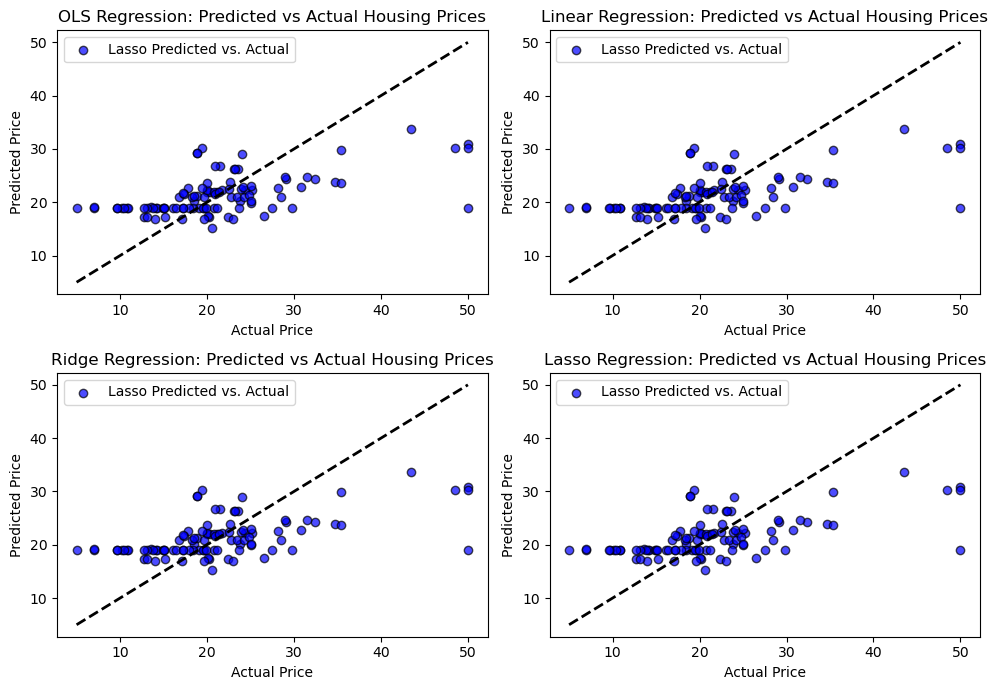

In [313]:
# simple linear regression using PTRATIO

# Define the feature matrix X and the target variable y
X_housing = df_housing_final.drop('MEDV', axis = 1)
y_housing = df_housing_final['MEDV']

# Use only the PTRATIO feature
X_housing_ptratio = df_housing_final[['PTRATIO']].values.reshape(-1,1)
y_housing = df_housing_final['MEDV']

# Split the dataset into training and testing sets
X_housing_train, X_housing_test, y_housing_train, y_housing_test = train_test_split(X_housing_ptratio, y, test_size=0.2, random_state=42)

# Feature scaling for sklearn models
scaler = RobustScaler()
X_housing_train_scaled = scaler.fit_transform(X_housing_train)
X_housing_test_scaled = scaler.transform(X_housing_test)

# Add a constant to the feature set for OLS regression
X_housing_ols_train = sm.add_constant(X_housing_train)
X_housing_ols_test = sm.add_constant(X_housing_test)

#finding best hyperparameters for Ridge and Lasso Models
housing_alpha_list = [0.00001, 0.0001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
housing_alpha_rr = 0
housing_alpha_lr = 0
housing_ridge = RidgeCV(alphas = housing_alpha_list).fit(X_housing_train_scaled, y_housing_train)
housing_lasso = LassoCV(alphas = housing_alpha_list).fit(X_housing_train_scaled, y_housing_train)
housing_alpha_rr = ridge.alpha_
housing_alpha_lr = lasso.alpha_

# Initialize and train models
housing_ols_model = sm.OLS(y_housing_train, X_housing_ols_train).fit()
housing_linear_model = LinearRegression().fit(X_housing_train_scaled, y_housing_train)
housing_ridge_cv = RidgeCV(alphas = [alpha_rr]).fit(X_housing_train_scaled, y_housing_train)
housing_lasso_cv = LassoCV(alphas = [alpha_lr]).fit(X_housing_train_scaled, y_housing_train)


# Predict with the models
y_housing_pred_ols = housing_ols_model.predict(X_housing_ols_test)
y_housing_pred_linear = housing_linear_model.predict(X_housing_test_scaled)
y_housing_pred_ridge = housing_ridge_cv.predict(X_housing_test_scaled)
y_housing_pred_lasso = housing_lasso_cv.predict(X_housing_test_scaled)

# Calculate and print R^2 score and MSE for each model
housing_models = ['OLS', 'Linear', 'Ridge', 'Lasso']
housing_predictions = [y_housing_pred_ols, y_housing_pred_linear, y_housing_pred_ridge, y_housing_pred_lasso]
for name, y_housing_pred in zip(housing_models, housing_predictions):
    print(f"{name} Regression R^2 score: {r2_score(y_housing_test, y_housing_pred):.4f}")
    print(f"{name} Regression MSE: {mean_squared_error(y_housing_test, y_housing_pred):.4f}\n")

# Plotting Actual vs Predicted prices for all models
fig, axs = plt.subplots(2, 2, figsize=(10, 7))
axs = axs.flatten()

for i, (housing_name, housing_y_pred) in enumerate(zip(models, predictions)):
    axs[i].scatter(y_housing_test, y_housing_pred, color='blue', edgecolor='k', alpha=0.7, label=f'{name} Predicted vs. Actual')
    axs[i].plot([y_housing_test.min(), y_housing_test.max()], [y_housing_test.min(), y_housing_test.max()], 'k--', lw=2)
    axs[i].set_xlabel('Actual Price')
    axs[i].set_ylabel('Predicted Price')
    axs[i].set_title(f'{housing_name} Regression: Predicted vs Actual Housing Prices')
    axs[i].legend()

plt.tight_layout()
plt.show()

OLS Regression R^2 score: 0.2845
OLS Regression MSE: 52.4713

Linear Regression R^2 score: 0.2845
Linear Regression MSE: 52.4713

Ridge Regression R^2 score: 0.2839
Ridge Regression MSE: 52.5112

Lasso Regression R^2 score: 0.2845
Lasso Regression MSE: 52.4715



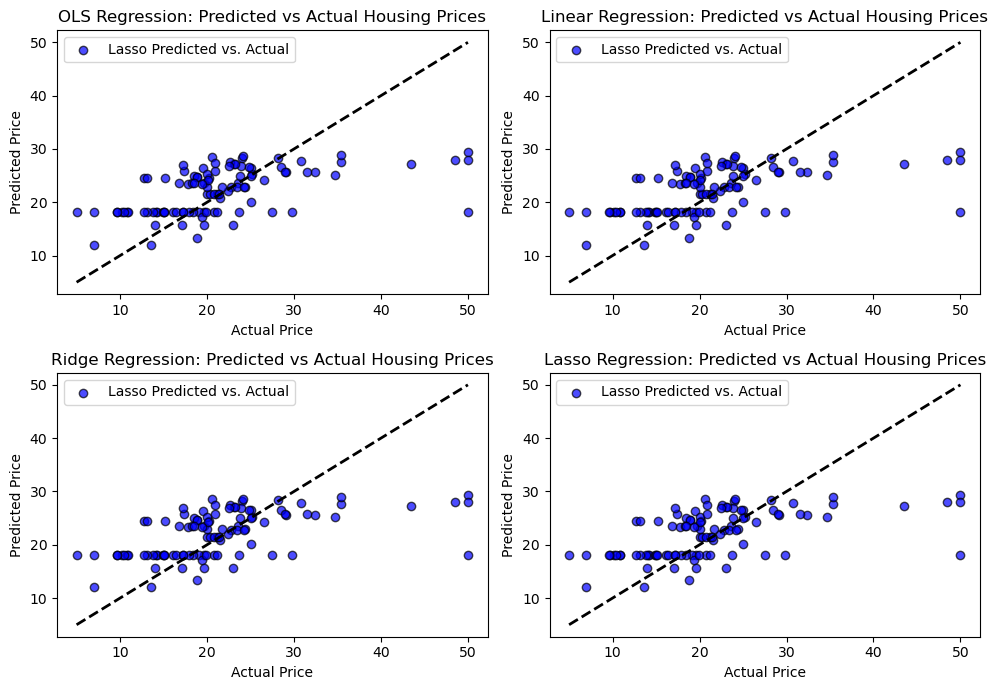

In [301]:
# simple linear regression using INDUS

# Load Boston housing dataset
X_housing = df_housing_final.drop('MEDV', axis = 1)
y_housing = df_housing_final['MEDV']

# Use only the INDUS feature
X_housing_indus = df_housing_final[['INDUS']].values.reshape(-1,1)
y_housing = df_housing_final['MEDV']

# Split the dataset into training and testing sets
X_housing_train, X_housing_test, y_housing_train, y_housing_test = train_test_split(X_housing_indus, y, test_size=0.2, random_state=42)

# Feature scaling for sklearn models
scaler = RobustScaler()
X_housing_train_scaled = scaler.fit_transform(X_housing_train)
X_housing_test_scaled = scaler.transform(X_housing_test)

# Add a constant to the feature set for OLS regression
X_housing_ols_train = sm.add_constant(X_housing_train)
X_housing_ols_test = sm.add_constant(X_housing_test)

#finding best hyperparameters for Ridge and Lasso Models
housing_alpha_list = [0.00001, 0.0001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
housing_alpha_rr = 0
housing_alpha_lr = 0
housing_ridge = RidgeCV(alphas = housing_alpha_list).fit(X_housing_train_scaled, y_housing_train)
housing_lasso = LassoCV(alphas = housing_alpha_list).fit(X_housing_train_scaled, y_housing_train)
housing_alpha_rr = ridge.alpha_
housing_alpha_lr = lasso.alpha_

# Initialize and train models
housing_ols_model = sm.OLS(y_housing_train, X_housing_ols_train).fit()
housing_linear_model = LinearRegression().fit(X_housing_train_scaled, y_housing_train)
housing_ridge_cv = RidgeCV(alphas = [alpha_rr]).fit(X_housing_train_scaled, y_housing_train)
housing_lasso_cv = LassoCV(alphas = [alpha_lr]).fit(X_housing_train_scaled, y_housing_train)


# Predict with the models
y_housing_pred_ols = housing_ols_model.predict(X_housing_ols_test)
y_housing_pred_linear = housing_linear_model.predict(X_housing_test_scaled)
y_housing_pred_ridge = housing_ridge_cv.predict(X_housing_test_scaled)
y_housing_pred_lasso = housing_lasso_cv.predict(X_housing_test_scaled)

# Calculate and print R^2 score and MSE for each model
housing_models = ['OLS', 'Linear', 'Ridge', 'Lasso']
housing_predictions = [y_housing_pred_ols, y_housing_pred_linear, y_housing_pred_ridge, y_housing_pred_lasso]
for name, y_housing_pred in zip(housing_models, housing_predictions):
    print(f"{name} Regression R^2 score: {r2_score(y_housing_test, y_housing_pred):.4f}")
    print(f"{name} Regression MSE: {mean_squared_error(y_housing_test, y_housing_pred):.4f}\n")

# Plotting Actual vs Predicted prices for all models
fig, axs = plt.subplots(2, 2, figsize=(10, 7))
axs = axs.flatten()

for i, (housing_name, housing_y_pred) in enumerate(zip(models, predictions)):
    axs[i].scatter(y_housing_test, y_housing_pred, color='blue', edgecolor='k', alpha=0.7, label=f'{name} Predicted vs. Actual')
    axs[i].plot([y_housing_test.min(), y_housing_test.max()], [y_housing_test.min(), y_housing_test.max()], 'k--', lw=2)
    axs[i].set_xlabel('Actual Price')
    axs[i].set_ylabel('Predicted Price')
    axs[i].set_title(f'{housing_name} Regression: Predicted vs Actual Housing Prices')
    axs[i].legend()

plt.tight_layout()
plt.show()

OLS Regression R^2 score: 0.2413
OLS Regression MSE: 55.6380

Linear Regression R^2 score: 0.2413
Linear Regression MSE: 55.6380

Ridge Regression R^2 score: 0.2416
Ridge Regression MSE: 55.6195

Lasso Regression R^2 score: 0.2413
Lasso Regression MSE: 55.6379



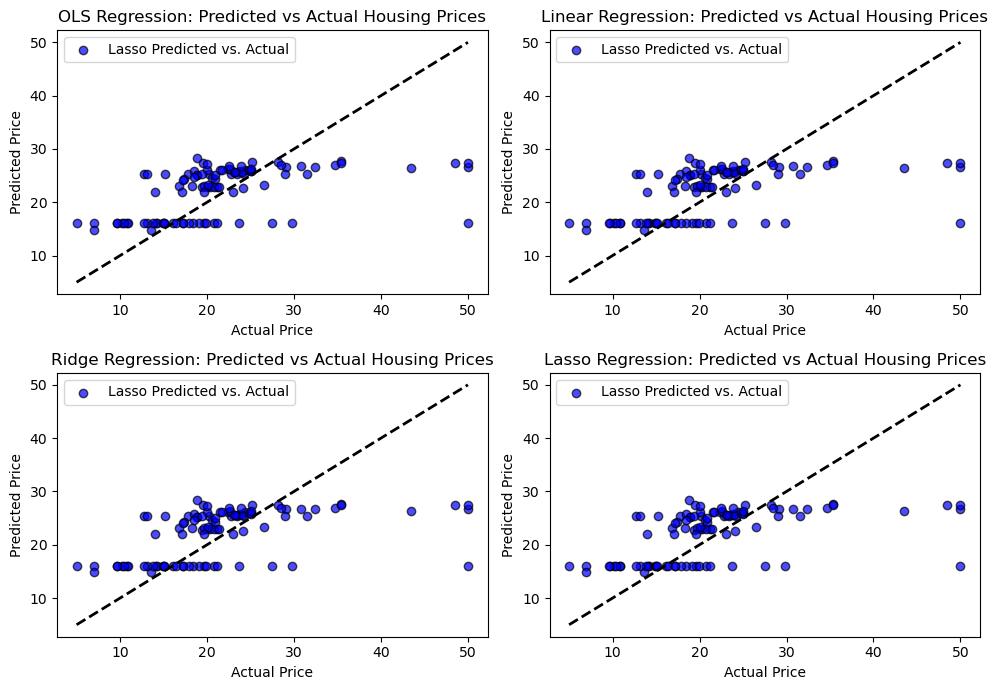

In [295]:
# single linear regression using TAX

# Load Boston housing dataset
X_housing = df_housing_final.drop('MEDV', axis = 1)
y_housing = df_housing_final['MEDV']

# Use only the TAX feature
X_housing_tax = df_housing_final[['TAX']].values.reshape(-1,1)
y_housing = df_housing_final['MEDV']

# Split the dataset into training and testing sets
X_housing_train, X_housing_test, y_housing_train, y_housing_test = train_test_split(X_housing_tax, y, test_size=0.2, random_state=42)

# Feature scaling for sklearn models
scaler = RobustScaler()
X_housing_train_scaled = scaler.fit_transform(X_housing_train)
X_housing_test_scaled = scaler.transform(X_housing_test)

# Add a constant to the feature set for OLS regression
X_housing_ols_train = sm.add_constant(X_housing_train)
X_housing_ols_test = sm.add_constant(X_housing_test)

#finding best hyperparameters for Ridge and Lasso Models
housing_alpha_list = [0.00001, 0.0001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
housing_alpha_rr = 0
housing_alpha_lr = 0
housing_ridge = RidgeCV(alphas = housing_alpha_list).fit(X_housing_train_scaled, y_housing_train)
housing_lasso = LassoCV(alphas = housing_alpha_list).fit(X_housing_train_scaled, y_housing_train)
housing_alpha_rr = ridge.alpha_
housing_alpha_lr = lasso.alpha_

# Initialize and train models
housing_ols_model = sm.OLS(y_housing_train, X_housing_ols_train).fit()
housing_linear_model = LinearRegression().fit(X_housing_train_scaled, y_housing_train)
housing_ridge_cv = RidgeCV(alphas = [alpha_rr]).fit(X_housing_train_scaled, y_housing_train)
housing_lasso_cv = LassoCV(alphas = [alpha_lr]).fit(X_housing_train_scaled, y_housing_train)


# Predict with the models
y_housing_pred_ols = housing_ols_model.predict(X_housing_ols_test)
y_housing_pred_linear = housing_linear_model.predict(X_housing_test_scaled)
y_housing_pred_ridge = housing_ridge_cv.predict(X_housing_test_scaled)
y_housing_pred_lasso = housing_lasso_cv.predict(X_housing_test_scaled)

# Calculate and print R^2 score and MSE for each model
housing_models = ['OLS', 'Linear', 'Ridge', 'Lasso']
housing_predictions = [y_housing_pred_ols, y_housing_pred_linear, y_housing_pred_ridge, y_housing_pred_lasso]
for name, y_housing_pred in zip(housing_models, housing_predictions):
    print(f"{name} Regression R^2 score: {r2_score(y_housing_test, y_housing_pred):.4f}")
    print(f"{name} Regression MSE: {mean_squared_error(y_housing_test, y_housing_pred):.4f}\n")

# Plotting Actual vs Predicted prices for all models
fig, axs = plt.subplots(2, 2, figsize=(10, 7))
axs = axs.flatten()

for i, (housing_name, housing_y_pred) in enumerate(zip(models, predictions)):
    axs[i].scatter(y_housing_test, y_housing_pred, color='blue', edgecolor='k', alpha=0.7, label=f'{name} Predicted vs. Actual')
    axs[i].plot([y_housing_test.min(), y_housing_test.max()], [y_housing_test.min(), y_housing_test.max()], 'k--', lw=2)
    axs[i].set_xlabel('Actual Price')
    axs[i].set_ylabel('Predicted Price')
    axs[i].set_title(f'{housing_name} Regression: Predicted vs Actual Housing Prices')
    axs[i].legend()

plt.tight_layout()
plt.show()

# **Q2. Perform the regression analysis using Fish dataset**

# Task 1: Linear regression (25 points).

• Fit a predictive linear regression model to estimate the weight of the fish from its length, height, and width.

• Report the coefficient values by using the standard Least Square Estimates.

• What is the standard error of the estimated coefficients, R-squared term?


OLS Regression Coefficients with std error:
Length1: coefficient = 52.6281 + (32.6915)
Length2: coefficient = 52.6078 + (25.0097)
Length3: coefficient = 19.3150 + (-29.7910)
Height: coefficient = 10.2621 + (23.8780)
Width: coefficient = 23.6003 + (15.9742)

R-Squared Value: 0.8883 



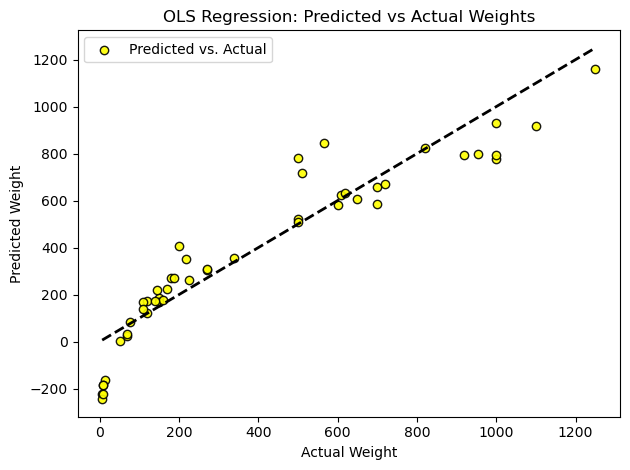

In [13]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.metrics import r2_score
import warnings as alerts
from sklearn.exceptions import ConvergenceWarning
alerts.filterwarnings("ignore", category = ConvergenceWarning)

# Load the Fish.csv dataset
df_fish = pd.read_csv('Fish.csv')

# Define the feature matrix X and the target variable y
X_fish = df_fish[['Length1', 'Length2', 'Length3', 'Height', 'Width']]
y_fish = df_fish['Weight']

# Split the dataset into training and testing sets
X_fish_train, X_fish_test, y_fish_train, y_fish_test = train_test_split(X_fish, y_fish, test_size=0.3, random_state=42)

# Feature scaling for sklearn models
scaler_fish = RobustScaler()
X_fish_train_scaled = scaler_fish.fit_transform(X_fish_train)
X_fish_test_scaled = scaler_fish.transform(X_fish_test)

# Add a constant to the feature set for OLS regression
X_fish_ols_train = sm.add_constant(X_fish_train)
X_fish_ols_test = sm.add_constant(X_fish_test)

# Initialize and train models
ols_fish_model = sm.OLS(y_fish_train, X_fish_ols_train).fit()

# Predict with the models
y_fish_pred_ols = ols_fish_model.predict(X_fish_ols_test)

# Print coefficients for OLS model
print("\nOLS Regression Coefficients with std error:")
for feature_i, par_i, coef_i in zip(X_fish_ols_train.columns, ols_fish_model.params, ols_fish_model.bse):
    if feature_i != 'const':
        print(f"{feature_i}: coefficient = {coef_i:.4f} + ({par_i:.4f})")

# Print R Squared value for ols model
print("\nR-Squared Value: {:.4f}".format(ols_fish_model.rsquared), "\n")

# Plotting Actual vs Predicted weight
plt.scatter(y_fish_test, y_fish_pred_ols, color='yellow', edgecolor='k', alpha=0.9, label='Predicted vs. Actual')
plt.plot([y_fish_test.min(), y_fish_test.max()], [y_fish_test.min(), y_fish_test.max()], 'k--', lw=2)
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.title('OLS Regression: Predicted vs Actual Weights')
plt.legend()
plt.tight_layout()
plt.show()

# Task 2: Ridge and Lasso Regression.

• Fit the Ridge and Lasso Regression Models

• Report the coefficients for Ridge and Lasso Regression models and the error of the estimated
coefficients, R-squared term


Ridge Regression Coefficients:

Length1: 287.4799
Length2: 247.2118
Length3: -195.7439
Height: 84.9337
Width: 73.7901

Lasso Regression Coefficients:

Length1: 287.4799
Length2: 247.2118
Length3: -195.7439
Height: 84.9337
Width: 73.7901

 Ridge Regression R^2 score: 0.8666 


 Lasso Regression R^2 score: 0.8663 



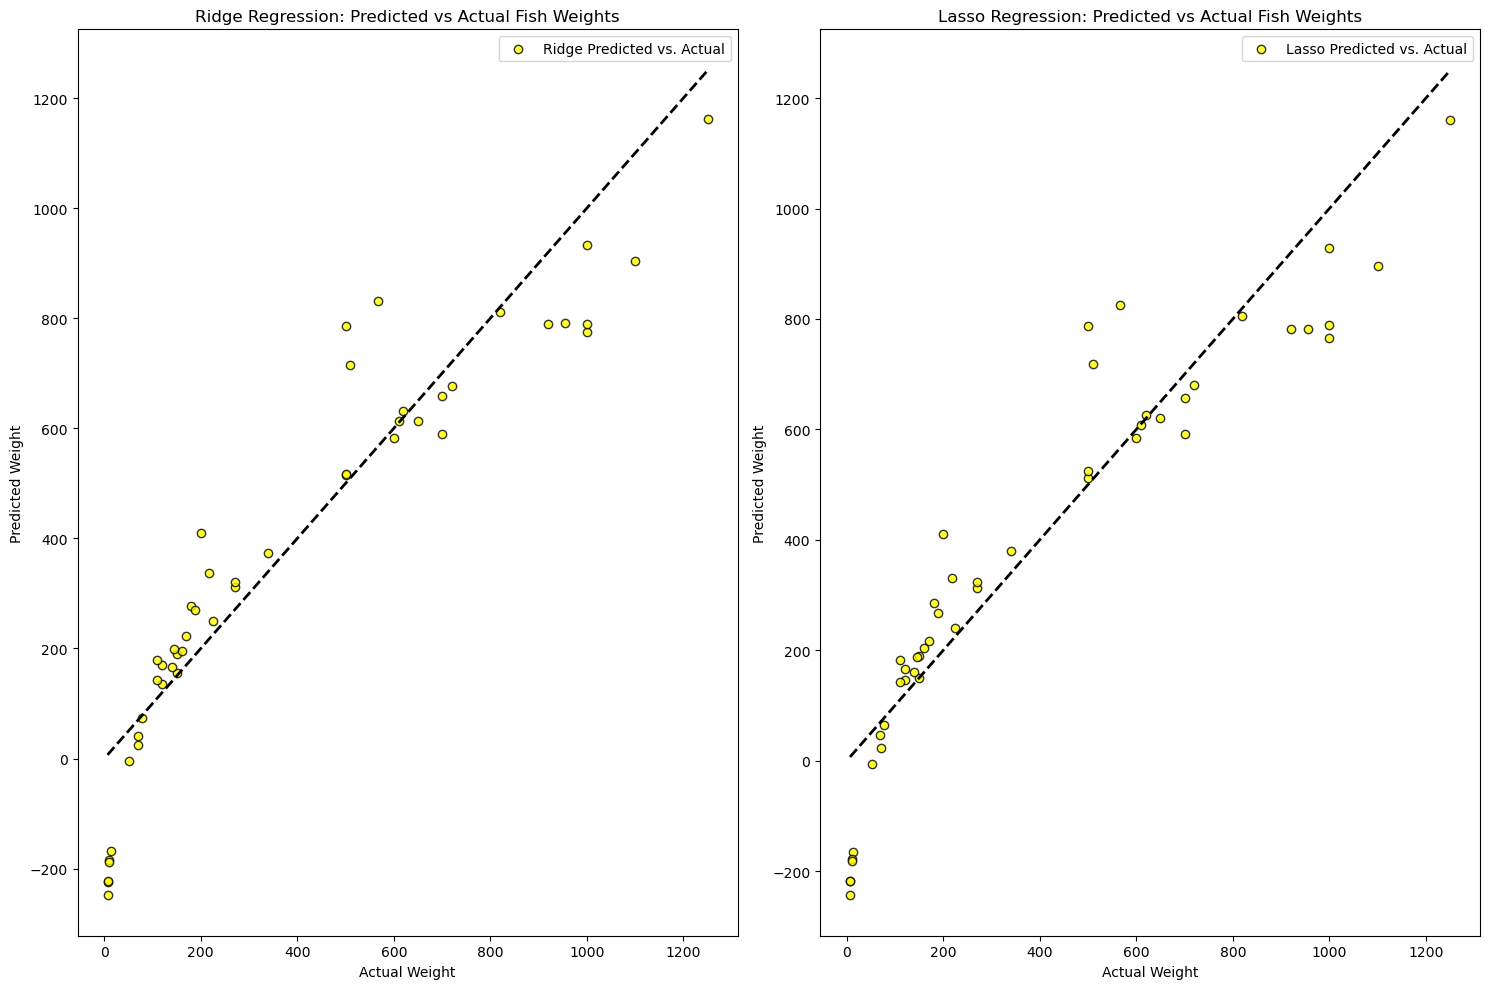

In [259]:
# Find best values of hyperparameters for Ridge and Lasso Models
alphas_fish = [0.0001, 0.01, 0.1, 1.0, 10.0, 100.0]
alpha_fish_rr = 0
alpha_fish_lr = 0
ridge_fish = RidgeCV(alphas = alphas_fish).fit(X_fish_train_scaled, y_fish_train)
lasso_fish = LassoCV(alphas = alphas_fish, tol = 1e-3).fit(X_fish_train_scaled, y_fish_train)
alpha_fish_rr = ridge_fish.alpha_
alpha_fish_lr = lasso_fish.alpha_
# Initialize and train models
ridge_fish_cv = RidgeCV(alphas = [alpha_fish_rr]).fit(X_fish_train_scaled, y_fish_train)
lasso_fish_cv = LassoCV(alphas = [alpha_fish_lr]).fit(X_fish_train_scaled, y_fish_train)
# Predict with the models
y_fish_pred_ridge = ridge_fish_cv.predict(X_fish_test_scaled)
y_fish_pred_lasso = lasso_fish_cv.predict(X_fish_test_scaled)

# Print coefficients for each model
print("\nRidge Regression Coefficients:\n")
for rr_coef_i, feature_ix in zip(ridge_fish_cv.coef_, X_fish.columns):
    print(f"{feature_ix}: {rr_coef_i:.4f}")
print("\nLasso Regression Coefficients:\n")
for lr_coef_i, feature_ix in zip(ridge_fish_cv.coef_, X_fish.columns):
    print(f"{feature_ix}: {lr_coef_i:.4f}")

# Calculate and display R^2 score for each model
models_fish = ['Ridge', 'Lasso']
predictions_fish = [y_fish_pred_ridge, y_fish_pred_lasso]

for name_fish, y_fish_pred in zip(models_fish, predictions_fish):
    print('\n',f"{name_fish} Regression R^2 score: {r2_score(y_fish_test, y_fish_pred):.4f}", '\n')

# Plotting Actual vs Predicted prices for all models
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
axs = axs.flatten()

for i, (name_fish, y_fish_pred) in enumerate(zip(models_fish, predictions_fish)):
    axs[i].scatter(y_fish_test, y_fish_pred, color='yellow', edgecolor='k', alpha=0.8, label=f'{name_fish} Predicted vs. Actual')
    axs[i].plot([y_fish_test.min(), y_fish_test.max()], [y_fish_test.min(), y_fish_test.max()], 'k--', lw=2)
    axs[i].set_xlabel('Actual Weight')
    axs[i].set_ylabel('Predicted Weight')
    axs[i].set_title(f'{name_fish} Regression: Predicted vs Actual Fish Weights')
    axs[i].legend()

plt.tight_layout()
plt.show()